In [2]:
# Selecting the required libraries and packages

In [46]:
from pathlib import Path # to interact with file system.


import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline


In [ ]:
# Loading the data


In [57]:
airfare_df = pd.read_csv("Airfares.csv")
airfare_df

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,LGA,New York/Newark NY,*,West Palm Beach FL,1.08,3,Yes,No,2216.70,32991.0,37375.0,8621121,991717,Controlled,Free,1030,34324,129.63
634,EWR,New York/Newark NY,*,West Palm Beach FL,1.08,0,Yes,No,2216.70,32991.0,37375.0,8621121,991717,Free,Constrained,1030,34324,129.63
635,*,Philadelphia/Camden PA,*,West Palm Beach FL,1.17,3,Yes,No,6797.80,27994.0,37375.0,4948339,991717,Free,Free,960,6016,124.87
636,IAD,Washington DC,*,West Palm Beach FL,1.28,3,Yes,No,5566.43,31981.0,37375.0,4549784,991717,Free,Free,858,4877,129.62


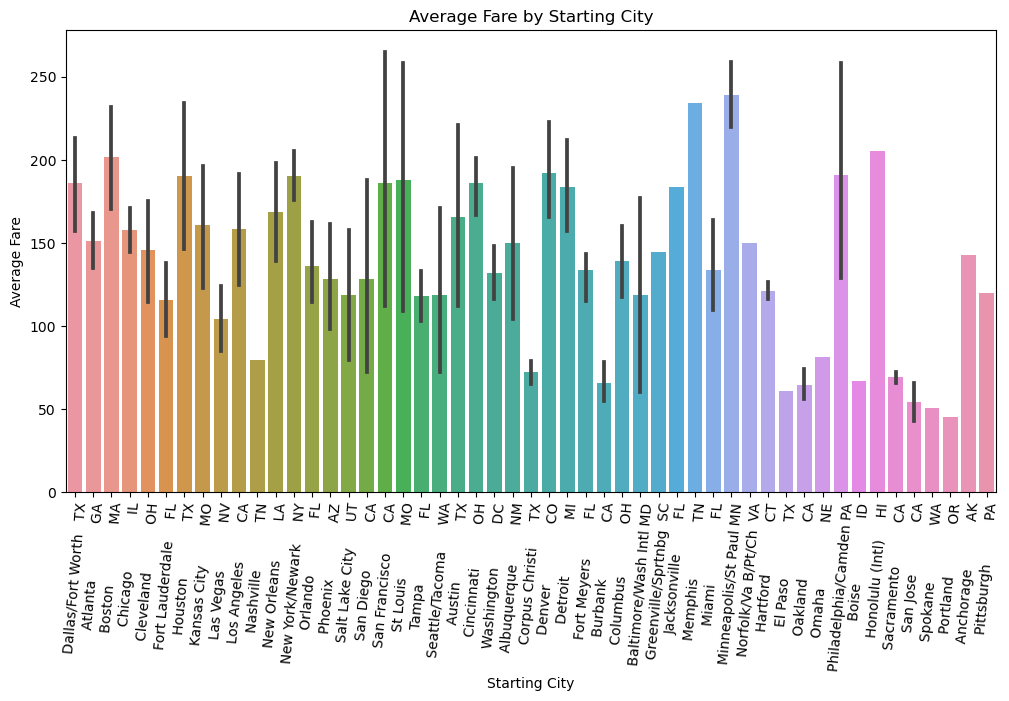

In [58]:
# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='S_CITY', y='FARE', data=airfare_df)
plt.title('Average Fare by Starting City')
plt.xlabel('Starting City')
plt.ylabel('Average Fare')
plt.xticks(rotation=85)
plt.show()

In [ ]:
#Since, first 4 columns are doesn't make any significance for the model, those were deleted

In [49]:
airfare_df.drop(['S_CODE','S_CITY','E_CODE','E_CITY'], axis=1, inplace=True)
airfare_df = airfare_df

In [62]:
airfare_df

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,1.08,3,Yes,No,2216.70,32991.0,37375.0,8621121,991717,Controlled,Free,1030,34324,129.63
634,1.08,0,Yes,No,2216.70,32991.0,37375.0,8621121,991717,Free,Constrained,1030,34324,129.63
635,1.17,3,Yes,No,6797.80,27994.0,37375.0,4948339,991717,Free,Free,960,6016,124.87
636,1.28,3,Yes,No,5566.43,31981.0,37375.0,4549784,991717,Free,Free,858,4877,129.62


In [ ]:
#Finding the co-relation between the numerical variables using heatmap

C:\Users\meeta\AppData\Local\Temp\ipykernel_21052\3415336660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = airfare_df.corr()


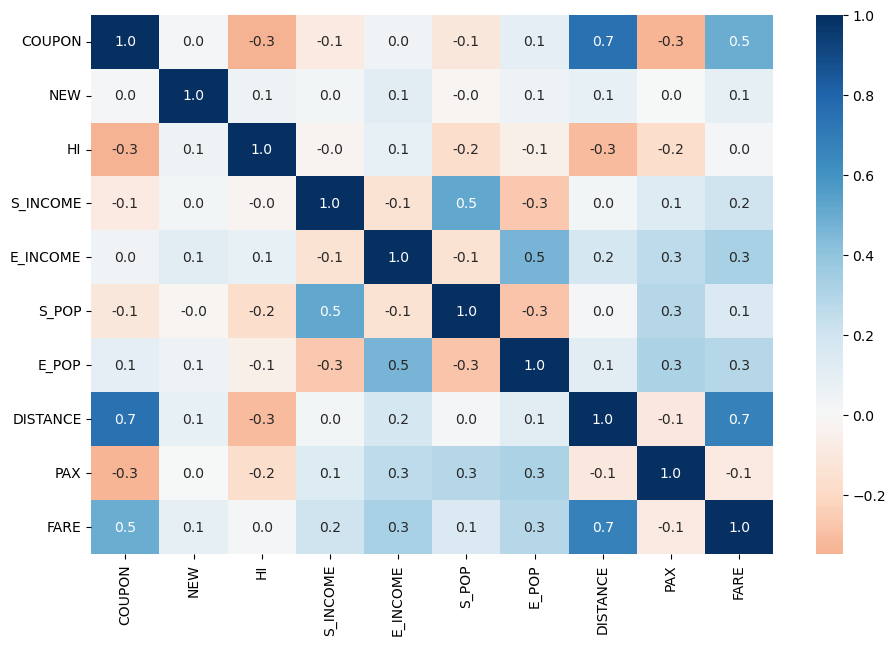

In [59]:
corr = airfare_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

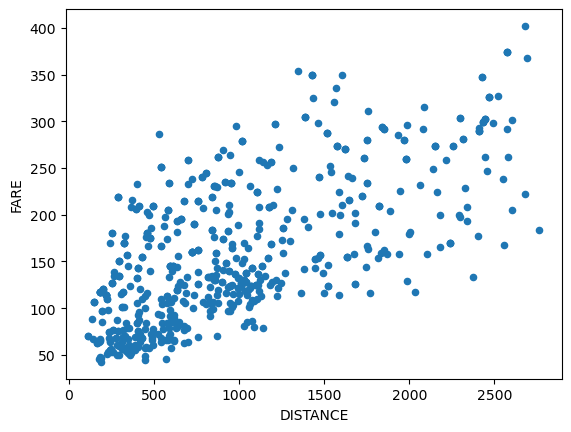

In [44]:
airfare_df.plot.scatter(x='DISTANCE', y='FARE', legend=True)
plt.show()

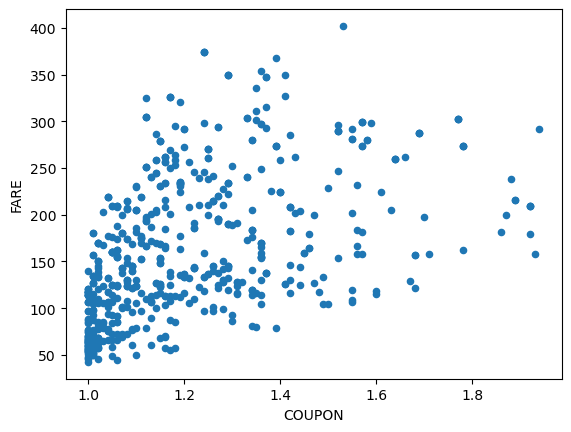

In [45]:
airfare_df.plot.scatter(x='COUPON', y='FARE', legend=True)
plt.show()

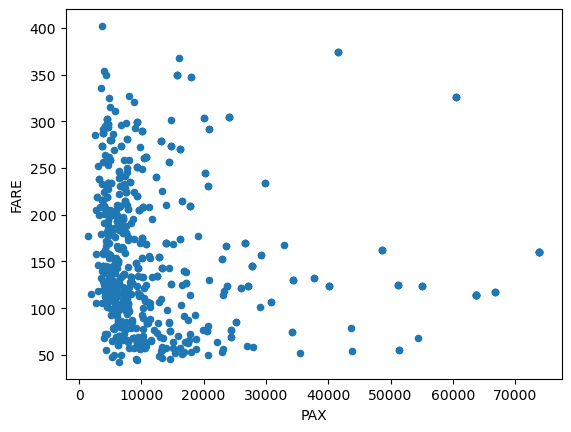

In [46]:
airfare_df.plot.scatter(x='PAX', y='FARE', legend=True)
plt.show()

In [51]:
cat_predictors = ['VACATION','SW','SLOT','GATE']
outcome = 'FARE'

In [ ]:
#analysing the effect of categorical predictors on FARE

In [52]:
X = pd.get_dummies(airfare_df[cat_predictors])
y=airfare_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=3)

air_lm = LinearRegression()
air_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', air_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': air_lm.coef_}))

# print performance measures
regressionSummary(train_y, air_lm.predict(train_X))


intercept  136.2221089125843
          Predictor  coefficient
0       VACATION_No    24.825868
1      VACATION_Yes   -24.825868
2             SW_No    42.693926
3            SW_Yes   -42.693926
4   SLOT_Controlled     3.862263
5         SLOT_Free    -3.862263
6  GATE_Constrained     3.269564
7         GATE_Free    -3.269564

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 60.3832
            Mean Absolute Error (MAE) : 49.2976
          Mean Percentage Error (MPE) : -14.6342
Mean Absolute Percentage Error (MAPE) : 35.9904


In [68]:
X = pd.get_dummies(airfare_df[['VACATION','SW','GATE','SLOT']])
y = airfare_df[outcome]
train_df = X.join(y)
train_df
X= sm.add_constant(X)
model=sm.OLS(y,X).fit()
print("F Value:",model.fvalue)
print("P-Value:",model.f_pvalue)
print('COEFFICIENTS:',model.params)
print('P-VALUES:',model.pvalues)
print(model.summary())

F Value: 92.77763085363162
P-Value: 4.489685747092673e-62
COEFFICIENTS: const               46.623373
VACATION_No         44.766449
VACATION_Yes         1.856924
SW_No               65.275077
SW_Yes             -18.651703
GATE_Constrained    28.842363
GATE_Free           17.781011
SLOT_Controlled     28.148256
SLOT_Free           18.475118
dtype: float64
P-VALUES: const               1.485060e-135
VACATION_No          1.057390e-56
VACATION_Yes         5.544068e-01
SW_No               7.667126e-100
SW_Yes               1.511455e-08
GATE_Constrained     6.341459e-14
GATE_Free            6.556003e-10
SLOT_Controlled      7.438934e-17
SLOT_Free            1.290623e-12
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     92

In [13]:
#Preparing a model to predict FARE

In [53]:
#Since few variables are Categorical, to predict the values we have to convert all variables to numerical
encoded_data = pd.get_dummies(airfare_df, columns=['VACATION', 'SW', 'SLOT', 'GATE'], prefix=['VACATION', 'SW', 'SLOT', 'GATE'])
# Combine the one-hot encoded data with the original 'airfare_df'
airfare_df_encoded = pd.concat([airfare_df, encoded_data], axis=1)
airfare_df_encoded.drop(['VACATION', 'SW', 'SLOT', 'GATE'], axis=1, inplace=True)
print(airfare_df_encoded)

     COUPON  NEW       HI  S_INCOME  E_INCOME    S_POP    E_POP  DISTANCE  \
0      1.00    3  5291.99   28637.0   21112.0  3036732   205711       312   
1      1.06    3  5419.16   26993.0   29838.0  3532657  7145897       576   
2      1.06    3  9185.28   30124.0   29838.0  5787293  7145897       364   
3      1.06    3  2657.35   29260.0   29838.0  7830332  7145897       612   
4      1.06    3  2657.35   29260.0   29838.0  7830332  7145897       612   
..      ...  ...      ...       ...       ...      ...      ...       ...   
633    1.08    3  2216.70   32991.0   37375.0  8621121   991717      1030   
634    1.08    0  2216.70   32991.0   37375.0  8621121   991717      1030   
635    1.17    3  6797.80   27994.0   37375.0  4948339   991717       960   
636    1.28    3  5566.43   31981.0   37375.0  4549784   991717       858   
637    1.28    3  5566.43   31981.0   37375.0  4549784   991717       858   

       PAX    FARE  ...    PAX    FARE  VACATION_No  VACATION_Yes  SW_No  \

In [54]:
X = airfare_df_encoded.drop('FARE', axis=1)  # Independent variables
y = airfare_df_encoded['FARE']  # Target variable
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=11)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)
print("MSE:",mse)
print("MAE:",mae)
print("RSquare:",r2)

MSE: 1268.8468995875162
MAE: 28.89012654376483
RSquare: 0.7778028370900032
